# Imports and Boilerplate

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
from jump_detection.processor import TimeSeriesProcessor
from jump_detection.utils import *
from jump_detection.plotting import *

# Initialization


In [4]:
# Define a window size for the moving Fstat
window_size = 150
gap_size = 10


# Step 1: Identify all jumps

In [5]:
processor = TimeSeriesProcessor(window_size, gap_size)
processor.load_data("13_4_decay_exp_data.csv")
processor.data = processor.data[0:300000,1:]

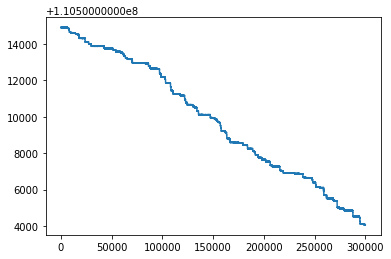

In [6]:
plt.plot(processor.data[:,1])
plt.show()

In [7]:
segments = processor.process_data()


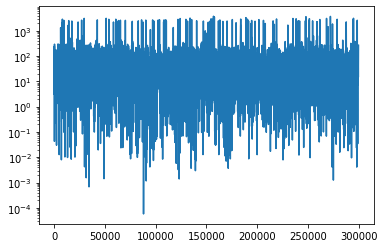

In [8]:
plt.plot(processor.moving_fstats)
plt.yscale('log')
# plt.ylim((0,10))

In [9]:
print(r"A total of %s jumps were found: "%len(processor.segments))


A total of 262 jumps were found: 


# Step 2: Reduce to single-event jumps

## Operating on individual segments

In [10]:
segment = processor.segments[10]

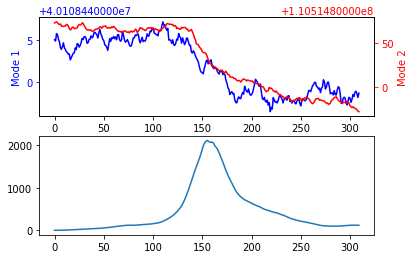

In [11]:
plot_segment(segment)

In [12]:
segment.features

(43,
 444.62274220899036,
 309747.17457276554,
 1.701162837309763,
 1.8406728747869838)

In [13]:
segment.calculate_freq_shift(window_size)
print(segment.diff)

[-1.53615772e-07 -6.39847205e-07]


## Getting all features

In [14]:
jump_features = processor.get_all_features()


## Plotting Feature Space and Eps Determination

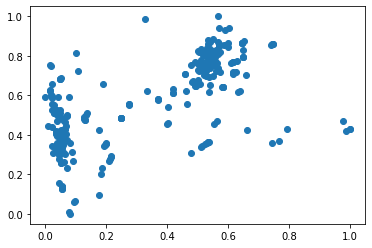

In [15]:
plt.scatter(jump_features[:,1],jump_features[:,3])

In [16]:
eps = get_eps(jump_features)
labels = get_class_labels(jump_features, eps/6)
plt.scatter(jump_features[:,1],jump_features[:,3], c = labels)

NameError: name 'get_eps' is not defined

# Step 3

In [ ]:
diffs = processor.get_all_diffs()
plt.scatter(diffs[:,0],diffs[:,1], c = labels)

In [ ]:
median_jump = calculate_median_jump(processor.segments, labels)

In [ ]:
plot_jump_signature(processor.segments, labels)